In [1]:
import pandas as pd
covid_data = pd.read_csv('covid_data.csv')
vaccinations_data = pd.read_csv('country_vaccinations.csv')

vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] *100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] *100

covid_df.shape

(86785, 18)

Основным методом для создания простейших графиков в Pandas является __plot()__.

Основные параметры метода ___plot()___  
- __x__ — название признака, который будет отложен по оси абсцисс  
- __y__ — название признака, который будет отложен по оси ординат  
- __figsize__ — размер графика (кортеж из ширины и высоты в дюймах)  
- __kind__ — тип визуализации. Основные типы:
> -_'line'_ — линейный график (по умолчанию)  
>_'bar'_ — столбчатая диаграмма  
>_'barh'_ — горизонтальная столбчатая диаграмма  
> _'hist'_ — гистограмма  
> _'box'_ — коробчатая диаграмма (boxplot)  
> _'pie'_ — круговая диаграмма  
'scatter' — диаграмма рассеяния
- __grid__ — отображение сетки (по умолчанию False)  
- __legend__ — отображение легенды (по умолчанию False)  
- __title__ — название графика  
- __color__ — цвет

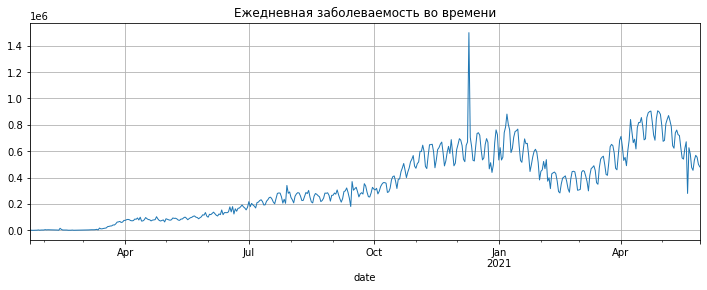

In [20]:
# Линейный график
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12,4),
    title='Ежедневная заболеваемость во времени',
    grid=True,
    lw=1, #ширина линии для ЛИНЕЙНОГО графика
);

Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная _grouped_cases_ — это объект __Series__.  
__plot()__ может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).  
При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

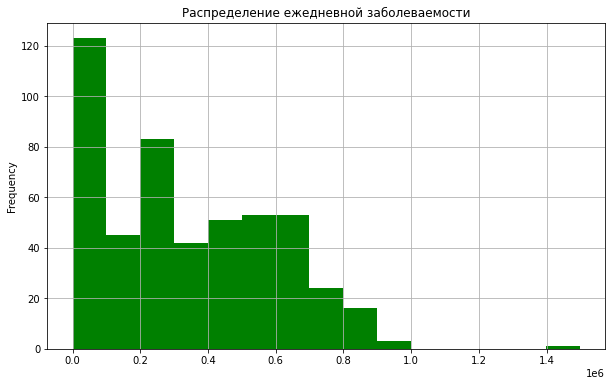

In [33]:
# Гистограмма
grouped_cases.plot(
    kind='hist',
    figsize=(10,6),
    title='Распределение ежедневной заболеваемости',
    grid=True,
    color='green',
    bins=15 # число прямоугольник для ГИСТОГРАММЫ
);
# х - диапозон ежедневной заб-ти
# у - число наблюдений в этот интервал

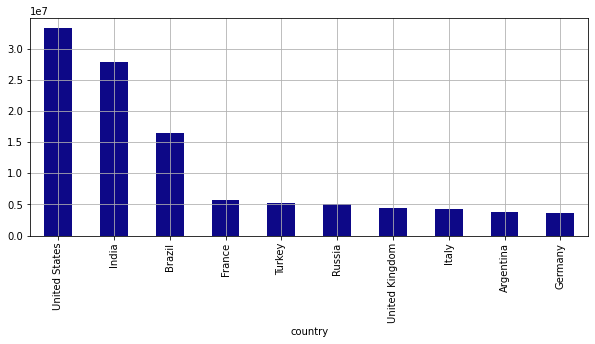

In [40]:
# Столбачатая диаграмма
# группируем по странам и вычислим последний зафиксированный показатель
# для этого используем метод last() - возвращает последнее значение в столбце
grouped_country = covid_df.groupby('country')['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(10,4),
    colormap='plasma' # цветовая грамма графика
);

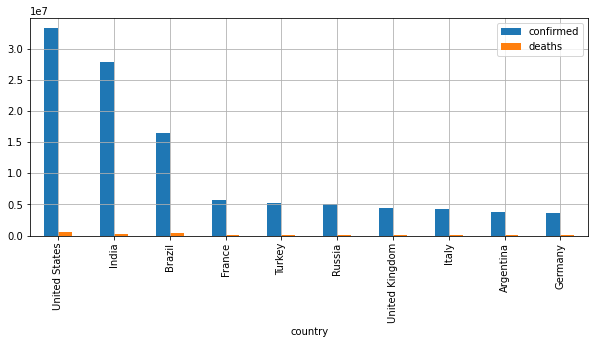

In [46]:
# соотношение количества заболевших и умерших
# для этого указываем 2 показателя
grouped_country = covid_df.groupby('country')[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10,columns='confirmed')
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(10,4)
);

<AxesSubplot:xlabel='country'>

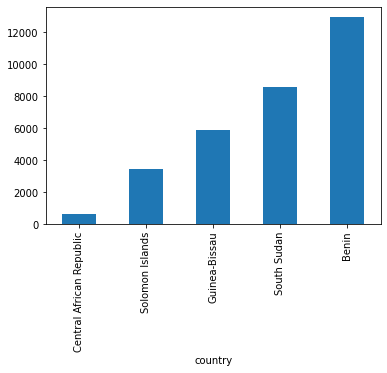

In [47]:
# 4.4-5
covid_df.groupby('country')['total_vaccinations'].last().nsmallest(5).plot(kind='bar')